In [1]:
import numpy as np
# population data in thousands. Question 1.1
kampala = np.array([1200, 1250, 1300, 1350, 1420, 1500, 1580, 1650, 1720, 1800])
wakiso = np.array([950, 1000, 1070, 1150, 1220, 1300, 1390, 1480, 1570, 1670])
gulu = np.array([320, 330, 345, 360, 375, 390, 410, 430, 455, 480])
print(kampala)
print(wakiso)
print(gulu)

[1200 1250 1300 1350 1420 1500 1580 1650 1720 1800]
[ 950 1000 1070 1150 1220 1300 1390 1480 1570 1670]
[320 330 345 360 375 390 410 430 455 480]


In [2]:
import statistics as stats
#Statistics for Kampala District:  Question 1.2
print("Kampala Mean:", stats.mean(kampala))
print("Kampala Median:", stats.median(kampala))
print("Kampala Variance:", stats.variance(kampala))
print("Kampala Standard Deviation:", stats.stdev(kampala.tolist()))

Kampala Mean: 1477
Kampala Median: 1460.0
Kampala Variance: 42601
Kampala Standard Deviation: 206.40036606341354


In [3]:
#Statistics for Wakiso District: Question 1.2
print("Wakiso Mean:", stats.mean(wakiso))
print("Wakiso Median:", stats.median(wakiso))
print("Wakiso Variance:", stats.variance(wakiso))
print("Wakiso Standard Deviation:", stats.stdev(wakiso.tolist()))

Wakiso Mean: 1280
Wakiso Median: 1260.0
Wakiso Variance: 60066
Wakiso Standard Deviation: 245.085019262024


In [4]:
#Statistics for Gulu District: Questions 1.2
print("Gulu Mean:", stats.mean(gulu))
print("Gulu Median:", stats.median(gulu))
print("Gulu Variance:", stats.variance(gulu))
print("Gulu Standard Deviation:", stats.stdev(gulu.tolist()))

Gulu Mean: 389
Gulu Median: 382.5
Gulu Variance: 2885
Gulu Standard Deviation: 53.71995284187555


In [5]:
def fibonacci(n):
    if n <= 0:
        return []
    if n == 1:
        return [1]
    fib_seq = [1, 1]
    while len(fib_seq) < n:
        fib_seq.append(fib_seq[-1] + fib_seq[-2])
    return fib_seq

# Generate 5 Fibonacci numbers: Question 1.3
next_5_year_of_growth = fibonacci(5)
print("Fibonacci projection:", next_5_year_of_growth)

#projected populations per district
kampala_projected = kampala[-1]+np.array(next_5_year_of_growth)
wakiso_projected = wakiso[-1]+np.array(next_5_year_of_growth)
gulu_projected = gulu[-1]+np.array(next_5_year_of_growth)
print("Kampala Projected Values",kampala_projected)
print("Wakiso Projected Values",wakiso_projected)
print("Gulu Projected Values",gulu_projected)



Fibonacci projection: [1, 1, 2, 3, 5]
Kampala Projected Values [1801 1801 1802 1803 1805]
Wakiso Projected Values [1671 1671 1672 1673 1675]
Gulu Projected Values [481 481 482 483 485]


In [6]:
#comparing the actual and projected variances: Question 1.4 
print("Kampala Actual Variance",np.var(kampala))
print("Kampala Projected Variance", np.var(kampala_projected))
print("Wakiso Actual Variance",np.var(wakiso))
print("Wakiso Projected Variance", np.var(wakiso_projected))
print("Gulu Actual Variance",np.var(gulu))
print("Gulu Projected Variance", np.var(gulu_projected))

Kampala Actual Variance 38341.0
Kampala Projected Variance 2.2399999999999998
Wakiso Actual Variance 54060.0
Wakiso Projected Variance 2.2399999999999998
Gulu Actual Variance 2597.25
Gulu Projected Variance 2.2399999999999998


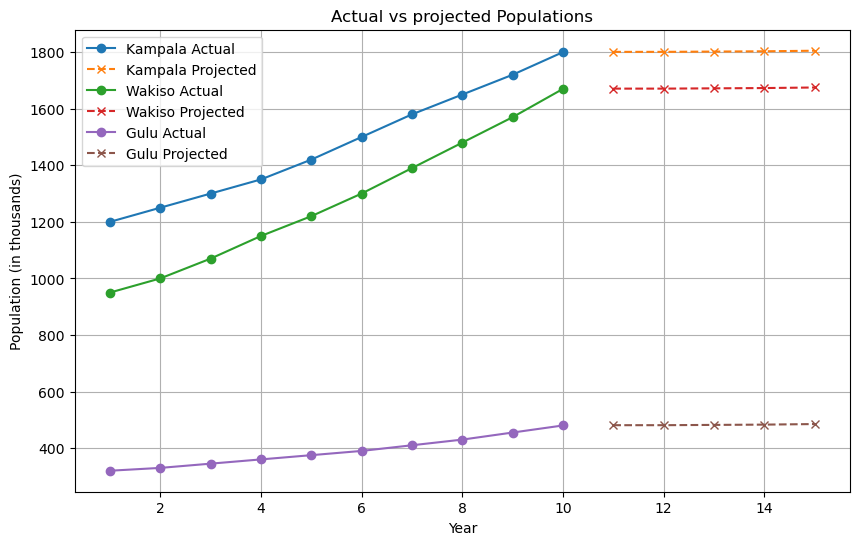

In [7]:
import matplotlib.pyplot as plt
# Years
years_actual = np.arange(1,11) #this is 10 years
years_projected= np.arange(11,16)
plt.figure(figsize=(10,6))
#Kampala
plt.plot(years_actual,kampala,marker='o',label = "Kampala Actual")
plt.plot(years_projected,kampala_projected,marker='x',linestyle='--',label="Kampala Projected")
plt.plot(years_actual,wakiso,marker='o',label = "Wakiso Actual")
plt.plot(years_projected,wakiso_projected,marker='x',linestyle='--',label="Wakiso Projected")
plt.plot(years_actual,gulu,marker='o',label = "Gulu Actual")
plt.plot(years_projected,gulu_projected,marker='x',linestyle='--',label="Gulu Projected")

plt.title("Actual vs projected Populations")
plt.xlabel("Year")
plt.ylabel("Population (in thousands)")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Q2.1 Prompt user input for D1 and D2 (single-day)
def prompt_D1_D2():
    while True:
        try:
            D1 = float(input("Enter D1 (daily demand for equation 1, e.g. 1500): ").strip())
            D2 = float(input("Enter D2 (daily demand for equation 2, e.g. 1200): ").strip())
            return D1, D2
        except ValueError:
            print("Invalid input — please enter numeric values (e.g. 1500 or 1200.5).")

# Example usage:
D1, D2 = prompt_D1_D2()
print("You entered D1 =", D1, "and D2 =", D2)


Enter D1 (daily demand for equation 1, e.g. 1500):  1500
Enter D2 (daily demand for equation 2, e.g. 1200):  1200


You entered D1 = 1500.0 and D2 = 1200.0


In [9]:
import numpy as np
from scipy import linalg          # for scipy.linalg.solve()
import statistics as stats       
import matplotlib.pyplot as plt

# Q2.2 Solve for one day using scipy.linalg.solve
A = np.array([[3.0, 2.0],
              [4.0, 1.0]])

# Use D1, D2 from Q2.1 or set them manually:
# D1, D2 = 1500.0, 1200.0

# Check determinant (non-zero -> unique solution)
det = np.linalg.det(A)
print("Determinant of A =", det)
if det == 0:
    raise ValueError("Coefficient matrix is singular — no unique solution.")

b = np.array([D1, D2], dtype=float)
solution = linalg.solve(A, b)   # returns array([x, y])
x, y = solution
print(f"Solution -> solar (x) = {x:.6f}, batteries (y) = {y:.6f}")


Determinant of A = -4.999999999999999
Solution -> solar (x) = 180.000000, batteries (y) = 480.000000


In [10]:
# Q2.3 Repeat for 7 days and store results
days = 7
results = np.zeros((days, 2), dtype=float)  # column0 -> x (solar), column1 -> y (battery)

for i in range(days):
    print(f"\n--- Day {i+1} ---")
    D1, D2 = prompt_D1_D2()           # uses function from 2.1
    b = np.array([D1, D2], dtype=float)
    sol = linalg.solve(A, b)          # sol = [x, y]
    results[i, :] = sol
    print(f" Day {i+1} -> x (solar) = {sol[0]:.6f}, y (battery) = {sol[1]:.6f}")

print("\nAll days solved. Results array (rows=days, cols=[x,y]):")
print(results)



--- Day 1 ---


Enter D1 (daily demand for equation 1, e.g. 1500):  1500
Enter D2 (daily demand for equation 2, e.g. 1200):  1200


 Day 1 -> x (solar) = 180.000000, y (battery) = 480.000000

--- Day 2 ---


Enter D1 (daily demand for equation 1, e.g. 1500):  1600
Enter D2 (daily demand for equation 2, e.g. 1200):  1250


 Day 2 -> x (solar) = 180.000000, y (battery) = 530.000000

--- Day 3 ---


Enter D1 (daily demand for equation 1, e.g. 1500):  1400
Enter D2 (daily demand for equation 2, e.g. 1200):  1180


 Day 3 -> x (solar) = 192.000000, y (battery) = 412.000000

--- Day 4 ---


Enter D1 (daily demand for equation 1, e.g. 1500):  1550
Enter D2 (daily demand for equation 2, e.g. 1200):  1300


 Day 4 -> x (solar) = 210.000000, y (battery) = 460.000000

--- Day 5 ---


Enter D1 (daily demand for equation 1, e.g. 1500):  1580
Enter D2 (daily demand for equation 2, e.g. 1200):  1280


 Day 5 -> x (solar) = 196.000000, y (battery) = 496.000000

--- Day 6 ---


Enter D1 (daily demand for equation 1, e.g. 1500):  1620
Enter D2 (daily demand for equation 2, e.g. 1200):  1275


 Day 6 -> x (solar) = 186.000000, y (battery) = 531.000000

--- Day 7 ---


Enter D1 (daily demand for equation 1, e.g. 1500):  1490
Enter D2 (daily demand for equation 2, e.g. 1200):  1220


 Day 7 -> x (solar) = 190.000000, y (battery) = 460.000000

All days solved. Results array (rows=days, cols=[x,y]):
[[180. 480.]
 [180. 530.]
 [192. 412.]
 [210. 460.]
 [196. 496.]
 [186. 531.]
 [190. 460.]]


In [11]:
# Q2.4 Compute stats using statistics module 
solar = results[:, 0]
battery = results[:, 1]

solar_list = solar.tolist()
battery_list = battery.tolist()

# Using statistics (sample variance & sample stdev)
print("--- Statistics (using statistics module) ---")
print("Solar (x): mean = {:.6f}, variance = {:.6f}, stdev = {:.6f}".format(
    stats.mean(solar_list), stats.variance(solar_list), stats.stdev(solar_list)))
print("Battery (y): mean = {:.6f}, variance = {:.6f}, stdev = {:.6f}".format(
    stats.mean(battery_list), stats.variance(battery_list), stats.stdev(battery_list)))

# Numpy equivalents (sample variance with ddof=1)
print("\n--- Numpy equivalents ---")
print("Solar mean (np):", np.mean(solar))
print("Solar var (np, ddof=1):", np.var(solar, ddof=1))
print("Solar std (np, ddof=1):", np.std(solar, ddof=1))
print("Battery mean (np):", np.mean(battery))
print("Battery var (np, ddof=1):", np.var(battery, ddof=1))
print("Battery std (np, ddof=1):", np.std(battery, ddof=1))


--- Statistics (using statistics module) ---
Solar (x): mean = 190.571429, variance = 108.952381, stdev = 10.438026
Battery (y): mean = 481.285714, variance = 1794.904762, stdev = 42.366316

--- Numpy equivalents ---
Solar mean (np): 190.57142857142858
Solar var (np, ddof=1): 108.95238095238096
Solar std (np, ddof=1): 10.43802572100591
Battery mean (np): 481.2857142857143
Battery var (np, ddof=1): 1794.9047619047617
Battery std (np, ddof=1): 42.366316359872044


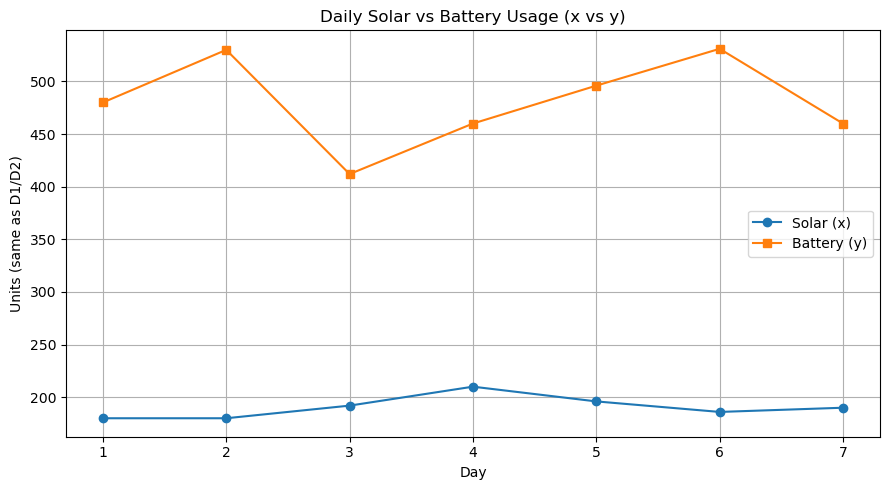

In [12]:
# Q2.5 Plot daily solar vs battery usage
days_axis = np.arange(1, days + 1)

plt.figure(figsize=(9,5))
plt.plot(days_axis, results[:,0], marker='o', linestyle='-', label='Solar (x)')
plt.plot(days_axis, results[:,1], marker='s', linestyle='-', label='Battery (y)')

plt.title("Daily Solar vs Battery Usage (x vs y)")
plt.xlabel("Day")
plt.ylabel("Units (same as D1/D2)")
plt.xticks(days_axis)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
import statistics
import matplotlib.pyplot as plt
# Initialize Fibonacci sequence
fib_stock = [0, 1]  # first two Fibonacci numbers

# Generate next 13 numbers (to make total 15)
for i in range(2, 15):
    next_number = fib_stock[i-1] + fib_stock[i-2]
    fib_stock.append(next_number)

print("Fish stock (kg):", fib_stock)


Fish stock (kg): [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


In [14]:
#Simulate fish prices in UGX per kg
fish_prices = [12000, 12500, 11800, 13000, 12800, 12750, 12600, 12900, 12400, 12250, 12100, 12350, 12550, 12850, 12700]
print("Fish prices (UGX/kg):", fish_prices)


Fish prices (UGX/kg): [12000, 12500, 11800, 13000, 12800, 12750, 12600, 12900, 12400, 12250, 12100, 12350, 12550, 12850, 12700]


In [15]:
#Multiply stock × price to estimate daily revenue.
daily_revenue = [stock * price for stock, price in zip(fib_stock, fish_prices)]
print("Daily revenue (UGX):", daily_revenue)


Daily revenue (UGX): [0, 12500, 11800, 26000, 38400, 63750, 100800, 167700, 260400, 416500, 665500, 1099150, 1807200, 2994050, 4787900]


In [16]:
#Question 3.4
mean_revenue = statistics.mean(daily_revenue)
median_revenue = statistics.median(daily_revenue)
variance_revenue = statistics.variance(daily_revenue)

print("Mean revenue:", mean_revenue)
print("Median revenue:", median_revenue)
print("Variance of revenue:", variance_revenue)


Mean revenue: 830110
Median revenue: 167700
Variance of revenue: 1911082135428.5715


In [18]:
# Question 3.5
if variance_revenue > 50000:
    print("Risk level: High risk")
else:
    print("Risk level: Low risk")


Risk level: High risk


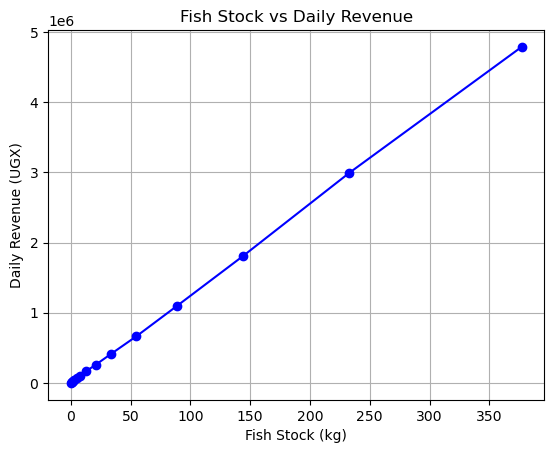

In [19]:
# Question 3.6
plt.plot(fib_stock, daily_revenue, marker='o', color='blue')
plt.title("Fish Stock vs Daily Revenue")
plt.xlabel("Fish Stock (kg)")
plt.ylabel("Daily Revenue (UGX)")
plt.grid(True)
plt.show()


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Question 4.1 Store rainfall data in a NumPy array.
kampala_rainfall = np.array([120, 140, 180, 200, 220, 180, 90, 70, 60, 100, 110, 130])
print("Kampala Rainfall (mm):", kampala_rainfall)


Kampala Rainfall (mm): [120 140 180 200 220 180  90  70  60 100 110 130]


In [22]:
# Question 4.2 Compute mean rainfall and classify months as 'Good for maize' (>150mm) or 'Drought risk' (<150mm).
mean_rainfall = np.mean(kampala_rainfall)
print("Mean rainfall in Kampala:", mean_rainfall)

# Classification
rainfall_classification = ["Good for maize" if x > 150 else "Drought risk" for x in kampala_rainfall]
print("Month-wise classification:", rainfall_classification)


Mean rainfall in Kampala: 133.33333333333334
Month-wise classification: ['Drought risk', 'Drought risk', 'Good for maize', 'Good for maize', 'Good for maize', 'Good for maize', 'Drought risk', 'Drought risk', 'Drought risk', 'Drought risk', 'Drought risk', 'Drought risk']


In [23]:
# Question 4.3: Simulate Gulu rainfall with different values.
gulu_rainfall = np.array([100, 130, 170, 190, 210, 160, 80, 60, 50, 90, 105, 120])
print("Gulu Rainfall (mm):", gulu_rainfall)


Gulu Rainfall (mm): [100 130 170 190 210 160  80  60  50  90 105 120]


In [24]:
# Question 4.4: Compute cosine similarity of Kampala vs Gulu rainfall trends using math.cos().
dot_product = np.dot(kampala_rainfall, gulu_rainfall)
norm_kampala = np.linalg.norm(kampala_rainfall)
norm_gulu = np.linalg.norm(gulu_rainfall)

cosine_similarity = dot_product / (norm_kampala * norm_gulu)
print("Cosine similarity between Kampala and Gulu rainfall:", cosine_similarity)


Cosine similarity between Kampala and Gulu rainfall: 0.9992218218004164


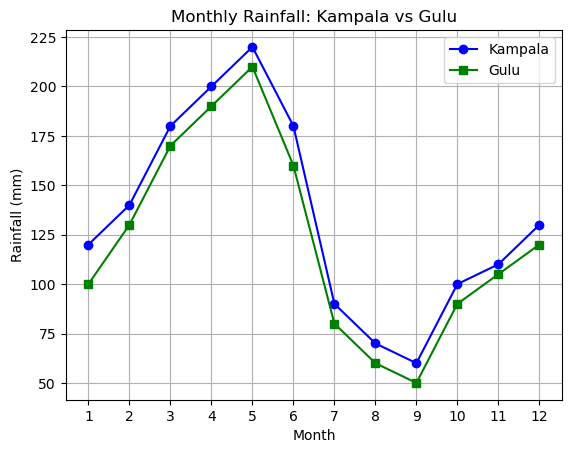

In [25]:
# Question 4.5: Plot both regions' rainfall in one chart.
months = np.arange(1, 13)  # Months 1-12

plt.plot(months, kampala_rainfall, marker='o', label='Kampala', color='blue')
plt.plot(months, gulu_rainfall, marker='s', label='Gulu', color='green')
plt.title("Monthly Rainfall: Kampala vs Gulu")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.xticks(months)
plt.grid(True)
plt.legend()
plt.show()


In [26]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.linalg import solve
# Question 5.1: Store passenger counts in a NumPy array.
passenger_counts = np.array([35, 40, 42, 50, 55, 60, 48, 52, 47, 45])
print("Passenger counts:", passenger_counts)


Passenger counts: [35 40 42 50 55 60 48 52 47 45]


In [27]:
# Question 5.2: Compute daily revenues at UGX 2000 per passenger.
fare_per_passenger = 2000
daily_revenue = passenger_counts * fare_per_passenger
print("Daily revenue (UGX):", daily_revenue)


Daily revenue (UGX): [ 70000  80000  84000 100000 110000 120000  96000 104000  94000  90000]


In [32]:
import statistics

# Question 5.3: Convert NumPy array to list
daily_revenue_list = daily_revenue.tolist()

mean_revenue = statistics.mean(daily_revenue_list)
variance_revenue = statistics.variance(daily_revenue_list)
std_dev_revenue = statistics.stdev(daily_revenue_list)

print("Mean revenue:", mean_revenue)
print("Variance of revenue:", variance_revenue)
print("Standard deviation:", std_dev_revenue)




Mean revenue: 94800
Variance of revenue: 217066666.66666666
Standard deviation: 14733.182502998687


In [33]:
# Question 5.4: Use scipy.linalg.solve to model a simple supply-demand system.
import numpy as np
from scipy.linalg import solve

# Coefficient matrix
A = np.array([[2, 3],
              [5, 2]])

# Constants
B = np.array([400, 550])

# Solve system
solution = solve(A, B)
print("Solution (x=taxis, y=passengers per taxi):", solution)


Solution (x=taxis, y=passengers per taxi): [77.27272727 81.81818182]


In [34]:
# Question 5.5: Forecast 11th day's revenue using average of last 3 days.
forecast_revenue_11 = np.mean(daily_revenue[-3:])
print("Forecasted revenue for 11th day (UGX):", forecast_revenue_11)


Forecasted revenue for 11th day (UGX): 96000.0


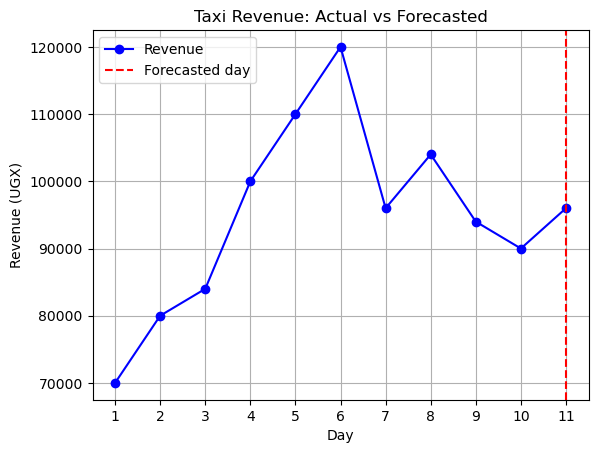

In [35]:
# Question 5.6: Plot actual vs forecasted revenues.
days = np.arange(1, 12)  # Days 1 to 11
revenues_with_forecast = np.append(daily_revenue, forecast_revenue_11)

plt.plot(days, revenues_with_forecast, marker='o', color='blue', label='Revenue')
plt.axvline(x=11, color='red', linestyle='--', label='Forecasted day')
plt.title("Taxi Revenue: Actual vs Forecasted")
plt.xlabel("Day")
plt.ylabel("Revenue (UGX)")
plt.xticks(days)
plt.grid(True)
plt.legend()
plt.show()
